# Imports 

In [1]:
import ipynb.fs.full.PrepareData as data
from sklearn.multioutput import MultiOutputRegressor
import itertools

strategyArray = []
errorArray    = [[], []]

/home/leandro/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
  0%|          | 0/43 [00:00<?, ?it/s]

[250, 247, 243, 250, 240, 247, 250, 253, 249, 247, 245, 248, 248]
2 chs: 250 entries
3 chs: 247 entries
4 chs: 243 entries
5 chs: 250 entries
6 chs: 240 entries
7 chs: 247 entries
8 chs: 250 entries
9 chs: 253 entries
10 chs: 249 entries
15 chs: 247 entries
20 chs: 245 entries
30 chs: 248 entries
40 chs: 248 entries
Dataset entries: 3120


 74%|███████▍  | 32/43 [00:26<00:04,  2.32it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 95%|█████████▌| 41/43 [00:27<00:00,  4.32it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 13.54it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:10<00:02,  4.42it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:12<00:01,  4.36it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:15<00:01,  3.36it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:02, 12.93it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 88%|████████▊ | 38/43 [00:09<00:01,  2.98it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 88%|████████▊ | 38/43 [00:10<00:01,  3.75it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


 21%|██        | 9/43 [00:00<00:03, 10.82it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 32/43 [00:09<00:02,  4.66it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 91%|█████████ | 39/43 [00:10<00:00,  4.76it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:16<00:00,  2.66it/s]


# Sorting the dataset

In [2]:
sortedDict = {}
commonRegressors = data.commonRegressors

for regressor in commonRegressors:
    sortedDict[regressor] = 0
    
    for i in range(data.ampNumber):
        sortedDict[regressor] += data.finalList[i][regressor][0] + data.finalList[i][regressor][1]

sortedDict = dict(sorted(sortedDict.items(), key = lambda x : x[1]))
sortedDict = dict(itertools.islice(sortedDict.items(), 5))

print(sortedDict.keys())

dict_keys(['TweedieRegressor', 'GeneralizedLinearRegressor', 'BayesianRidge', 'OrthogonalMatchingPursuitCV', 'ElasticNetCV'])


# Processing data

In [3]:
from sklearn.metrics import mean_absolute_error

def getMAE(yTrue, yPredicted):
    gainErrors = []
    lossErrors = []
    
    rangeList = list(range(len(yTrue[0])))
    
    for true, predicted in zip(yTrue, yPredicted):
        gainTrue      = [true[x] for x in rangeList[0::2]]
        gainPredicted = [predicted[x] for x in rangeList[0::2]]
        lossTrue      = [true[x] for x in rangeList[1::2]]
        lossPredicted = [predicted[x] for x in rangeList[1::2]]
        
        gainErrors.append(mean_absolute_error(gainTrue, gainPredicted))
        lossErrors.append(mean_absolute_error(lossTrue, lossPredicted))
        
    return gainErrors, lossErrors

# Plotting function

In [4]:
import matplotlib.pyplot as plt

def plotGrid(gainData, lossData):
    fontSize = 32
    
    fig, axis = plt.subplots(2, figsize = (10, 10))
    
    axis[0].boxplot(gainData)
    axis[0].set_title("Test error for Gain", fontsize = fontSize)
    axis[0].get_xaxis().set_visible(False)
    axis[0].yaxis.set_tick_params(labelsize = fontSize)
    axis[0].set_yticklabels(range(0, 4))
    axis[0].set_ylim(0, 3)
    
    axis[1].boxplot(lossData)
    axis[1].set_title("Test error for Loss", fontsize = fontSize)
    axis[1].xaxis.set_tick_params(labelsize = fontSize)
    axis[1].yaxis.set_tick_params(labelsize = fontSize)
    axis[1].set_xticklabels(strategyArray)
    axis[1].set_yticklabels(range(0, 4))
    axis[1].set_ylim(0, 3)

    #fig.text(0.053, 0.5, 'Erro Médio Absoluto (dB)', va='center', rotation='vertical', fontsize = fontSize)

    plt.gcf().subplots_adjust(bottom = 0.08)
    fig.savefig("../../graphs/perVar-{}amp.pdf".format(data.ampNumber), format = 'pdf', dpi = 1000, bbox_inches = "tight")

# Building the models

In [5]:
cvData = []
X, y = data.loadDataset()

for i in range(5):
    X_train, X_test, y_train, y_test = data.train_test_split(X, y, test_size = 0.2, random_state = i)
    cvData.append([X_train, X_test, y_train, y_test])
    
count = 1

In [6]:
from sklearn.linear_model import BayesianRidge

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(BayesianRidge())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("BR")
count += 1

[17.  0. 19.  1. 24.  0.] [17.03982917  0.27122255 19.1513361   0.9827189  21.70776613  0.06343962]
[17.  0. 23.  5. 24.  1.] [17.02762574  0.2713309  19.14938296  0.98427136 21.69415826  0.11465769]
[17.  0. 19.  1. 19.  0.] [16.99231369  0.27584119 19.16943497  0.99323962 21.70645249  0.04651535]
[17.  0. 19.  1. 22.  1.] [17.02193042  0.26967766 19.14684126  0.973003   21.69548528  0.65684048]
[17.  0. 19.  1. 21.  0.] [17.02118189  0.26348174 19.15848783  0.98890294 21.72126941  0.09180937]


In [7]:
from sklearn.ensemble import RandomForestRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(RandomForestRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("RF".format(count))
count += 1

[17.  0. 19.  1. 24.  0.] [17.06589539  0.29630792 18.99833624  0.86573672 21.58961127  0.06151856]
[17.  0. 23.  5. 24.  1.] [17.03340693  0.26631616 19.2275343   1.05236823 21.69423762  0.1129673 ]
[17.  0. 19.  1. 19.  0.] [16.97703165  0.25781065 19.20202357  0.98367491 21.81909166  0.0446415 ]
[17.  0. 19.  1. 22.  1.] [17.02125717  0.25990684 19.04148693  0.87080705 21.57204469  0.65930246]
[17.  0. 19.  1. 21.  0.] [17.02128958  0.2327027  19.24673454  1.07473677 21.72950923  0.08997169]


In [8]:
from sklearn.tree import DecisionTreeRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(DecisionTreeRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("DT")
count += 1

[17.  0. 19.  1. 24.  0.] [17.06666667  0.2974359  19.00512821  0.86153846 21.58974359  0.06153846]
[17.  0. 23.  5. 24.  1.] [17.03141361  0.27225131 19.21989529  1.04188482 21.71204188  0.11518325]
[17.  0. 19.  1. 19.  0.] [16.97435897  0.25641026 19.21025641  0.97435897 21.78974359  0.04615385]
[17.  0. 19.  1. 22.  1.] [17.02631579  0.26315789 19.03157895  0.87368421 21.59473684  0.65789474]
[17.  0. 19.  1. 21.  0.] [17.01970443  0.23152709 19.25123153  1.09359606 21.74384236  0.08866995]


In [9]:
from sklearn.linear_model import LassoCV

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(LassoCV())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("LCV")
count += 1

[17.  0. 19.  1. 24.  0.] [17.05773676  0.26385224 19.15137437  0.98219125 21.70770422  0.06547289]
[17.  0. 23.  5. 24.  1.] [17.03265104  0.271777   19.2014189   1.00548181 21.69415408  0.10386102]
[17.  0. 19.  1. 19.  0.] [16.99050896  0.27604845 19.17504574  0.99341851 21.70538134  0.04615385]
[17.  0. 19.  1. 22.  1.] [17.02631579  0.26749593 19.13518193  0.95008076 21.69725126  0.65492118]
[17.  0. 19.  1. 21.  0.] [17.02285714  0.25956817 19.21541676  1.04189986 21.72202865  0.09001199]


In [10]:
from sklearn.dummy import DummyRegressor

errorArray[0].append([])
errorArray[1].append([])

for i in range(5):
    finalResult = []

    for j in range(0, data.ampNumber * 2):
        model = MultiOutputRegressor(DummyRegressor())
        model.fit(cvData[i][0], cvData[i][2][:, j: j + 1])

        result = model.predict(cvData[i][1])

        if len(finalResult) == 0:
            finalResult = result
        else:
            finalResult = data.np.hstack((finalResult, result))

    print(cvData[i][-1][0], finalResult[0])
    
    mae = getMAE(cvData[i][3], finalResult)

    errorArray[0][-1].extend(mae[0])
    errorArray[1][-1].extend(mae[1])

strategyArray.append("SM".format(count))
count += 1

[17.  0. 19.  1. 24.  0.] [17.03135889  0.27061556 19.15137437  0.98219125 21.70770422  0.27680991]
[17.  0. 23.  5. 24.  1.] [17.03019744  0.271777   19.14866434  0.98335269 21.69415408  0.2775842 ]
[17.  0. 19.  1. 19.  0.] [17.03174603  0.27719706 19.1656988   0.99341851 21.70538134  0.28261711]
[17.  0. 19.  1. 22.  1.] [17.03135889  0.27138986 19.14905149  0.9767712  21.69725126  0.28803717]
[17.  0. 19.  1. 21.  0.] [17.02826171  0.26287263 19.15640728  0.98722416 21.72202865  0.28261711]


dict_keys(['TweedieRegressor', 'GeneralizedLinearRegressor', 'BayesianRidge', 'OrthogonalMatchingPursuitCV', 'ElasticNetCV'])
### Gain ###
Mean: 0.822425129735045. Median: 0.8265524860023905
Mean: 0.824480379797068. Median: 0.8259826257897084
Mean: 0.8242722288461394. Median: 0.8281786941580762
Mean: 0.8226048687130861. Median: 0.8261352616022061
Mean: 0.8217164144219946. Median: 0.8263646922183506
### Loss ###
Mean: 0.5071907330642093. Median: 0.4801459717839005
Mean: 0.5109808838540352. Median: 0.49736325348563937
Mean: 0.5110285926377489. Median: 0.49828178694158076
Mean: 0.5077974633627013. Median: 0.48391252790349876
Mean: 0.5494487454088753. Median: 0.5220028390760098
Mean Total - Gain: 0.8230998043026666. Loss: 0.517289283665514


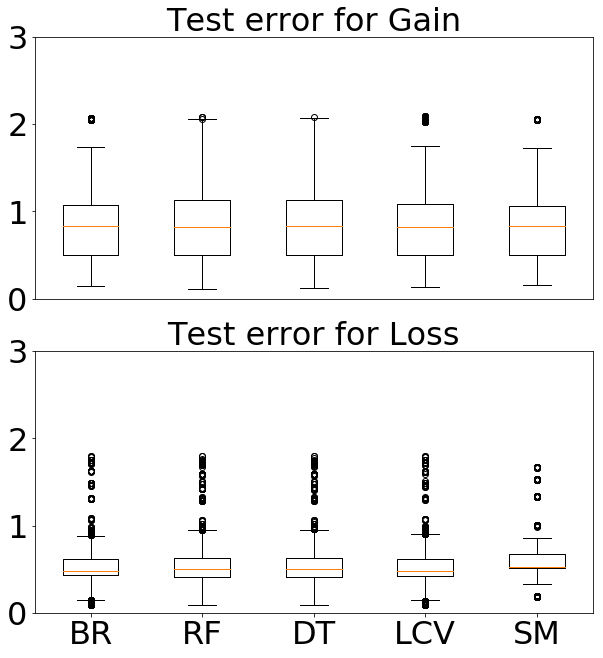

In [11]:
import numpy as np
print(sortedDict.keys())

gain = 0
print("### Gain ###")

for gainError in errorArray[0]:
    gain += np.mean(gainError)
    print("Mean: {}. Median: {}".format(np.mean(gainError), np.median(gainError)))

loss = 0
print("### Loss ###")

for lossError in errorArray[1]:
    loss += np.mean(lossError)
    print("Mean: {}. Median: {}".format(np.mean(lossError), np.median(lossError)))
    
print("Mean Total - Gain: {}. Loss: {}".format(gain / 5, loss / 5))
plotGrid(errorArray[0], errorArray[1])